# Holiday Classification

In [58]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [59]:
ecommerce = '/home/hp/Documents/College/Coding/holiday classification/data/Ecommerce_Data.csv'
holidays = '/home/hp/Documents/College/Coding/holiday classification/data/US_Holiday_Dates_(2004-2021).csv'

In [60]:
ecom_df = pd.read_csv(ecommerce,parse_dates=['Date'])
ecom_df

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Hour
0,439570,574477,22591,CARDHOLDER GINGHAM CHRISTMAS TREE,1,3.25,15453.0,United Kingdom,2011-11-04,12
1,387281,570275,23541,WALL ART CLASSIC PUDDINGS,12,7.45,13098.0,United Kingdom,2011-10-10,10
2,337863,566482,22508,DOORSTOP RETROSPOT HEART,12,3.75,16609.0,United Kingdom,2011-09-13,9
3,57628,541215,22662,LUNCH BAG DOLLY GIRL DESIGN,10,1.65,14329.0,United Kingdom,2011-01-14,13
4,330897,565930,POST,POSTAGE,5,18.00,12685.0,France,2011-09-08,10
...,...,...,...,...,...,...,...,...,...,...
81596,271411,560692,21294,ETCHED GLASS COASTER,4,0.39,14704.0,United Kingdom,2011-07-20,12
81597,44667,540187,22569,FELTCRAFT CUSHION BUTTERFLY,4,3.75,15358.0,United Kingdom,2011-01-05,13
81598,134884,547871,17012C,ORIGAMI LAVENDER INCENSE/CANDL SET,5,2.55,16931.0,United Kingdom,2011-03-27,14
81599,288051,562129,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,13186.0,United Kingdom,2011-08-03,9


In [61]:
ecom_df.Date.value_counts()

2011-11-06    710
2011-11-10    702
2011-11-23    676
2011-12-05    659
2011-11-20    620
             ... 
2010-12-21     87
2011-02-09     85
2010-12-23     65
2011-02-06     49
2010-12-22     35
Name: Date, Length: 305, dtype: int64

In [62]:
holidays_df = pd.read_csv(holidays, parse_dates=['Date'])
holidays_df

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008
...,...,...,...,...,...,...
337,2006-04-16,Western Easter,Sunday,4,16,2006
338,2017-04-16,Western Easter,Sunday,4,16,2017
339,2014-04-20,Western Easter,Sunday,4,20,2014
340,2019-04-21,Western Easter,Sunday,4,21,2019


In [63]:
holidays_df.Year.value_counts()

2004    19
2005    19
2020    19
2019    19
2018    19
2017    19
2016    19
2015    19
2014    19
2013    19
2012    19
2011    19
2010    19
2009    19
2008    19
2007    19
2006    19
2021    19
Name: Year, dtype: int64

In [64]:
holidays_df.Holiday.value_counts()

Labor Day Weekend              36
4th of July                    18
New Year's Day                 18
Washington's Birthday          18
Veterans Day                   18
Valentine’s Day                18
Thanksgiving Eve               18
Thanksgiving Day               18
New Year’s Eve                 18
Memorial Day                   18
Christmas Day                  18
Martin Luther King, Jr. Day    18
Labor Day                      18
Juneteenth                     18
Eastern Easter                 18
Columbus Day                   18
Christmas Eve                  18
Western Easter                 18
Name: Holiday, dtype: int64

In [65]:
merged_data = pd.merge(holidays_df,ecom_df, on='Date', how='right')

In [66]:
merged_data.head(20)

,Date,Holiday,WeekDay,Month,Day,Year,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Hour
0,2011-11-04,NaN,NaN,NaN,NaN,NaN,439570,574477,22591,CARDHOLDER GINGHAM CHRISTMAS TREE,1,3.25,15453.0,United Kingdom,12
1,2011-10-10,Columbus Day,Monday,10.0,10.0,2011.0,387281,570275,23541,WALL ART CLASSIC PUDDINGS,12,7.45,13098.0,United Kingdom,10
2,2011-09-13,NaN,NaN,NaN,NaN,NaN,337863,566482,22508,DOORSTOP RETROSPOT HEART,12,3.75,16609.0,United Kingdom,9
3,2011-01-14,NaN,NaN,NaN,NaN,NaN,57628,541215,22662,LUNCH BAG DOLLY GIRL DESIGN,10,1.65,14329.0,United Kingdom,13
4,2011-09-08,NaN,NaN,NaN,NaN,NaN,330897,565930,POST,POSTAGE,5,18.00,12685.0,France,10
5,2011-09-20,NaN,NaN,NaN,NaN,NaN,348380,567425,22114,HOT WATER BOTTLE TEA AND SYMPATHY,24,3.75,13767.0,United Kingdom,11
6,2011-10-11,NaN,NaN,NaN,NaN,NaN,391836,570680,22943,CHRISTMAS LIGHTS 10 VINTAGE BAUBLES,3,4.95,13969.0,United Kingdom,15
7,2011-06-12,NaN,NaN,NaN,NaN,NaN,223016,556469,85099C,JUMBO BAG BAROQUE BLACK WHITE,20,2.08,12516.0,Germany,11
8,2011-09-04,Labor Day Weekend,Sunday,9.0,4.0,2011.0,325016,565429,51008,AFGHAN SLIPPER SOCK PAIR,1,3.45,16434.0,United Kingdom,12
9,2011-10-30,NaN,NaN,NaN,NaN,NaN,428243,573415,23147,SINGLE ANTIQUE ROSE HOOK IVORY,1,1.45,13607.0,United Kingdom,16


In [67]:
merged_data.Holiday.isnull().sum()

77858

In [68]:
merged_data.shape

(81601, 15)

In [69]:
81601-77858


3743

In [70]:
merged_data.isnull().sum()

Date               0
Holiday        77858
WeekDay        77858
Month          77858
Day            77858
Year           77858
Unnamed: 0         0
InvoiceNo          0
StockCode          0
Description        0
Quantity           0
UnitPrice          0
CustomerID         0
Country            0
Hour               0
dtype: int64

In [71]:
merged_data.dropna(inplace=True)
merged_data

,Date,Holiday,WeekDay,Month,Day,Year,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Hour
1,2011-10-10,Columbus Day,Monday,10.0,10.0,2011.0,387281,570275,23541,WALL ART CLASSIC PUDDINGS,12,7.45,13098.0,United Kingdom,10
8,2011-09-04,Labor Day Weekend,Sunday,9.0,4.0,2011.0,325016,565429,51008,AFGHAN SLIPPER SOCK PAIR,1,3.45,16434.0,United Kingdom,12
33,2011-10-10,Columbus Day,Monday,10.0,10.0,2011.0,389989,570488,20655,QUEEN OF SKIES LUGGAGE TAG,1,2.46,14096.0,United Kingdom,17
36,2011-09-04,Labor Day Weekend,Sunday,9.0,4.0,2011.0,324638,565411,21528,DAIRY MAID TRADITIONAL TEAPOT,1,6.95,13772.0,United Kingdom,11
52,2011-11-23,Thanksgiving Eve,Wednesday,11.0,23.0,2011.0,492435,578118,15039,SANDALWOOD FAN,10,0.85,12955.0,United Kingdom,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81518,2011-11-23,Thanksgiving Eve,Wednesday,11.0,23.0,2011.0,495118,578290,23474,WOODLAND SMALL BLUE FELT HEART,12,0.83,13644.0,United Kingdom,14
81550,2011-11-11,Veterans Day,Friday,11.0,11.0,2011.0,457913,575751,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,3.95,14911.0,EIRE,10
81579,2011-11-11,Veterans Day,Friday,11.0,11.0,2011.0,457917,575751,84946,ANTIQUE SILVER T-LIGHT GLASS,12,1.25,14911.0,EIRE,10
81583,2011-11-23,Thanksgiving Eve,Wednesday,11.0,23.0,2011.0,494850,578277,23254,CHILDRENS CUTLERY DOLLY GIRL,2,4.15,12723.0,France,13


In [72]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3743 entries, 1 to 81594
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         3743 non-null   datetime64[ns]
 1   Holiday      3743 non-null   object        
 2   WeekDay      3743 non-null   object        
 3   Month        3743 non-null   float64       
 4   Day          3743 non-null   float64       
 5   Year         3743 non-null   float64       
 6   Unnamed: 0   3743 non-null   int64         
 7   InvoiceNo    3743 non-null   object        
 8   StockCode    3743 non-null   object        
 9   Description  3743 non-null   object        
 10  Quantity     3743 non-null   int64         
 11  UnitPrice    3743 non-null   float64       
 12  CustomerID   3743 non-null   float64       
 13  Country      3743 non-null   object        
 14  Hour         3743 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(6)


In [73]:
merged_data['customer_expenditure'] = merged_data.Quantity * merged_data.UnitPrice

In [74]:

merged_data.shape

(3743, 16)

In [75]:
merged_data.drop(['Unnamed: 0', 'Description'], axis=1, inplace=True)

In [76]:
merged_data

,Date,Holiday,WeekDay,Month,Day,Year,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Hour,customer_expenditure
1,2011-10-10,Columbus Day,Monday,10.0,10.0,2011.0,570275,23541,12,7.45,13098.0,United Kingdom,10,89.40
8,2011-09-04,Labor Day Weekend,Sunday,9.0,4.0,2011.0,565429,51008,1,3.45,16434.0,United Kingdom,12,3.45
33,2011-10-10,Columbus Day,Monday,10.0,10.0,2011.0,570488,20655,1,2.46,14096.0,United Kingdom,17,2.46
36,2011-09-04,Labor Day Weekend,Sunday,9.0,4.0,2011.0,565411,21528,1,6.95,13772.0,United Kingdom,11,6.95
52,2011-11-23,Thanksgiving Eve,Wednesday,11.0,23.0,2011.0,578118,15039,10,0.85,12955.0,United Kingdom,10,8.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81518,2011-11-23,Thanksgiving Eve,Wednesday,11.0,23.0,2011.0,578290,23474,12,0.83,13644.0,United Kingdom,14,9.96
81550,2011-11-11,Veterans Day,Friday,11.0,11.0,2011.0,575751,71477,12,3.95,14911.0,EIRE,10,47.40
81579,2011-11-11,Veterans Day,Friday,11.0,11.0,2011.0,575751,84946,12,1.25,14911.0,EIRE,10,15.00
81583,2011-11-23,Thanksgiving Eve,Wednesday,11.0,23.0,2011.0,578277,23254,2,4.15,12723.0,France,13,8.30


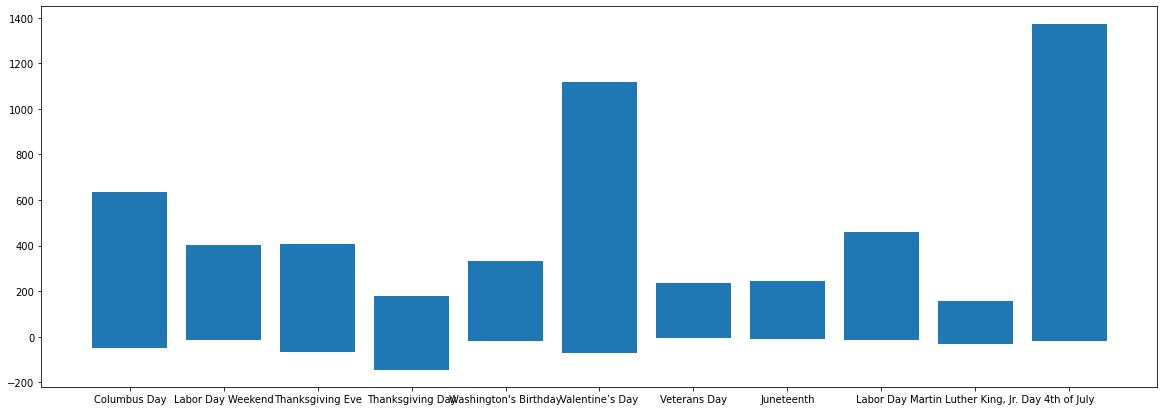

In [77]:
plt.figure(figsize=(20,7))
plt.bar(merged_data.Holiday, merged_data.customer_expenditure)
plt.show()

In [78]:
pd.crosstab(merged_data.Holiday, merged_data.Country)

Country,Australia,Belgium,Cyprus,EIRE,Finland,France,Germany,Italy,Malta,Netherlands,Poland,Portugal,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
Holiday,,,,,,,,,,,,,,,,,,
4th of July,0,0,0,0,0,2,13,0,0,0,0,0,3,0,0,0,0,168
Columbus Day,0,2,0,17,0,3,1,0,0,0,0,0,0,0,0,22,0,511
Juneteenth,0,0,0,1,0,0,0,0,0,10,0,0,12,0,0,0,0,216
Labor Day,1,0,0,6,0,9,0,0,0,0,4,0,9,0,0,0,0,251
Labor Day Weekend,0,0,0,1,0,9,23,0,0,0,0,0,0,0,0,0,0,233
"Martin Luther King, Jr. Day",3,0,0,0,0,3,14,0,0,0,8,0,0,0,0,0,0,164
Thanksgiving Day,2,0,0,1,0,31,27,0,0,0,0,12,2,0,0,0,0,420
Thanksgiving Eve,0,0,0,1,1,6,8,1,2,11,0,0,0,0,5,0,0,641
Valentine’s Day,0,0,0,17,0,0,6,0,0,0,0,0,0,0,0,0,8,114


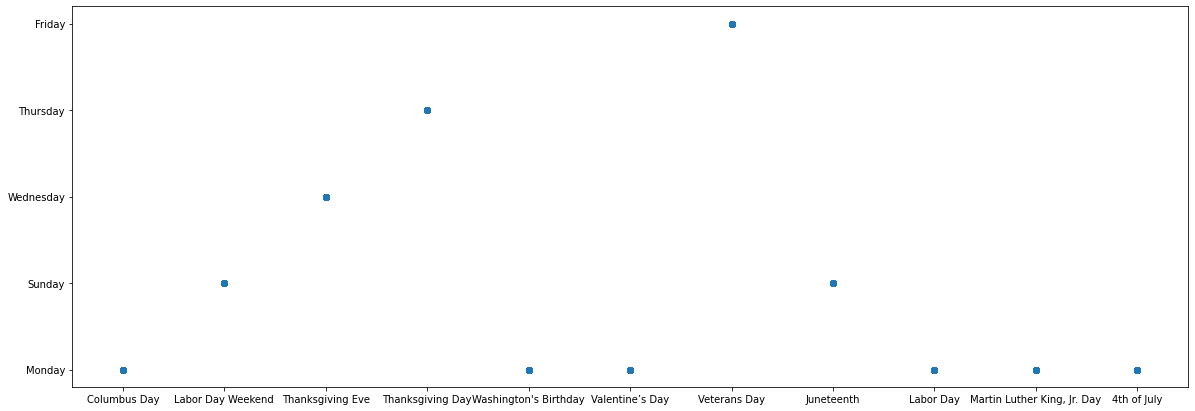

In [79]:
plt.figure(figsize=(20,7))
plt.scatter(merged_data.Holiday, merged_data.WeekDay)
plt.show()

In [80]:
merged_data.columns

Index(['Date', 'Holiday', 'WeekDay', 'Month', 'Day', 'Year', 'InvoiceNo',
       'StockCode', 'Quantity', 'UnitPrice', 'CustomerID', 'Country', 'Hour',
       'customer_expenditure'],
      dtype='object')

In [84]:
merged_data.drop(['InvoiceNo','StockCode', 'CustomerID','Hour'], axis=1,inplace=True)

In [89]:
#converting the non numeric columns into pandas categories
for label, content in merged_data.items():
    if pd.api.types.is_string_dtype(content):
        merged_data[label] = content.astype('category').cat.as_ordered()

In [90]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3743 entries, 1 to 81594
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  3743 non-null   datetime64[ns]
 1   Holiday               3743 non-null   category      
 2   WeekDay               3743 non-null   category      
 3   Month                 3743 non-null   float64       
 4   Day                   3743 non-null   float64       
 5   Year                  3743 non-null   float64       
 6   Quantity              3743 non-null   int64         
 7   UnitPrice             3743 non-null   float64       
 8   Country               3743 non-null   category      
 9   customer_expenditure  3743 non-null   float64       
dtypes: category(3), datetime64[ns](1), float64(5), int64(1)
memory usage: 246.2 KB


In [95]:
merged_data['Year'] = merged_data['Year'].astype(int)

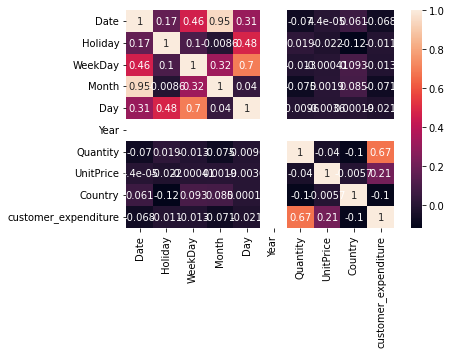

In [96]:
#plotting a correlation matrix
plt.figure()
dataplot = sns.heatmap(merged_data.corr(), annot=True)
plt.show()

In [97]:
for label, content in merged_data.items():
    if not pd.api.types.is_numeric_dtype(content):
        merged_data[label] = pd.Categorical(content).codes+1

In [92]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3743 entries, 1 to 81594
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  3743 non-null   int8   
 1   Holiday               3743 non-null   int8   
 2   WeekDay               3743 non-null   int8   
 3   Month                 3743 non-null   float64
 4   Day                   3743 non-null   float64
 5   Year                  3743 non-null   float64
 6   Quantity              3743 non-null   int64  
 7   UnitPrice             3743 non-null   float64
 8   Country               3743 non-null   int8   
 9   customer_expenditure  3743 non-null   float64
dtypes: float64(5), int64(1), int8(4)
memory usage: 219.3 KB


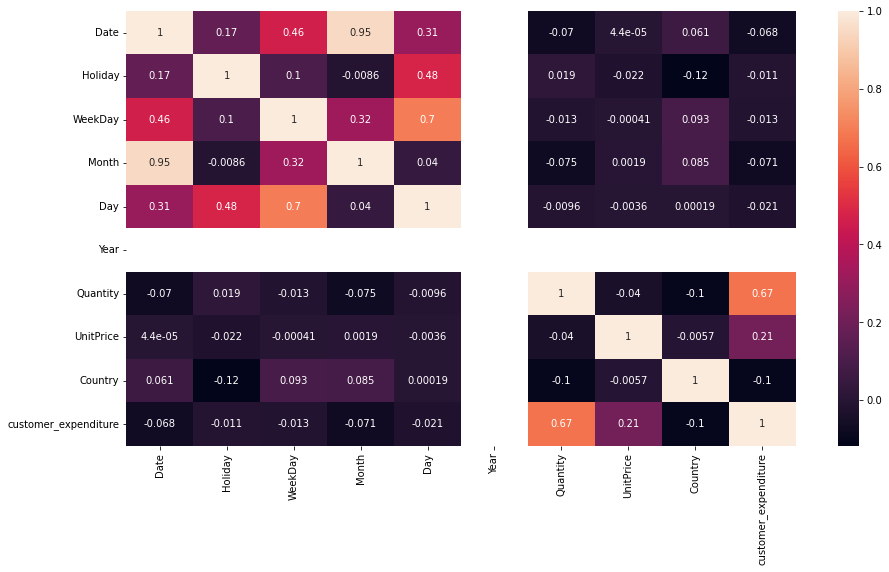

In [98]:
#plotting a correlation matrix
plt.figure(figsize=(15,8))
dataplot = sns.heatmap(merged_data.corr(), annot=True)
plt.show()

In [99]:
merged_data.head(20)

,Date,Holiday,WeekDay,Month,Day,Year,Quantity,UnitPrice,Country,customer_expenditure
1,8,2,2,10.0,10.0,2011,12,7.45,18,89.40
8,6,5,3,9.0,4.0,2011,1,3.45,18,3.45
33,8,2,2,10.0,10.0,2011,1,2.46,18,2.46
36,6,5,3,9.0,4.0,2011,1,6.95,18,6.95
52,10,8,5,11.0,23.0,2011,10,0.85,18,8.50
54,11,7,4,11.0,24.0,2011,1,2.95,18,2.95
75,3,11,2,2.0,21.0,2011,6,2.95,3,17.70
95,2,9,2,2.0,14.0,2011,3,1.25,18,3.75
113,9,10,1,11.0,11.0,2011,2,4.95,18,9.90
152,4,3,3,6.0,19.0,2011,2,1.25,18,2.50
